# COMP 135 day03: Beta Distributions


In [2]:
import numpy as np
import scipy.stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Beta distribution as a PDF

#### Formal definition: 

$$
\text{BetaPDF}(\mu | a, b) = c(a, b) \cdot \mu^{a-1} (1-\mu)^{b-1}
$$

#### Standard Numerical implementations

Thankfully, you can use the built-in functions from SciPy to compute this function:

* `stats.beta.pdf(\cdot)` computes the pdf$
* `stats.beta.logpdf(\cdot)` computes the natural log of the pdf
* * Will often be more numerically stable than doing `np.log(stats.beta.pdf(\cdot))`

See <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html>


# Plots across different values of hyperparameters a, b


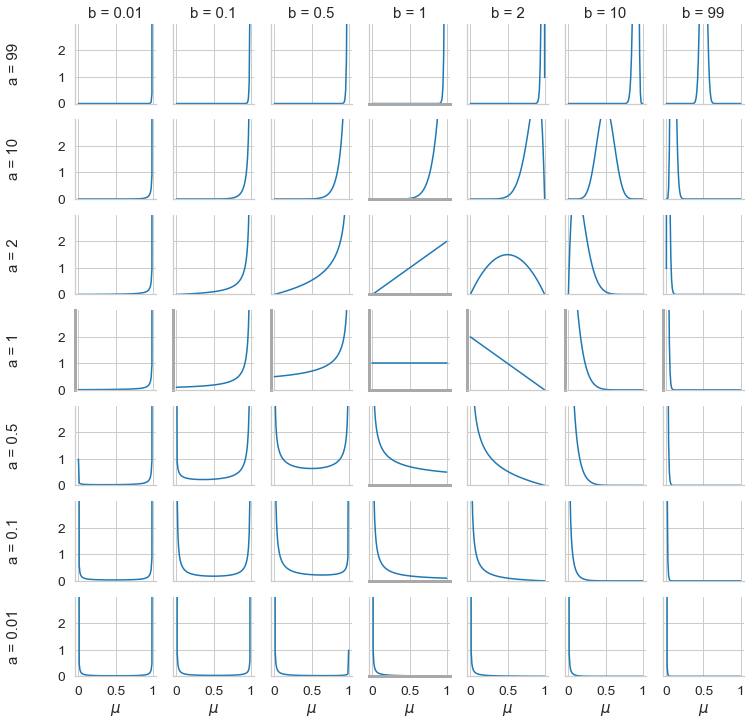

In [60]:
agrid_G = np.asarray([0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 99.0])
bgrid_H = np.asarray([0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 99.0])
G = agrid_G.size
H = bgrid_H.size

mu_vals = np.linspace(0.0001, 0.9999, 101)

fig, axgrid = plt.subplots(nrows=len(agrid_G), ncols=len(bgrid_H), sharex=True, sharey=True, figsize=(12, 12));
axgrid = axgrid[::-1] # flip order of rows

for gg in range(G):
    for hh in range(H):
        axgrid[gg, hh].plot(mu_vals, scipy.stats.beta(agrid_G[gg], bgrid_H[hh]).pdf(mu_vals), '-')
        if hh == 0:
            axgrid[gg, hh].set_ylabel('a = %.2g\n\n' % agrid_G[gg]);
        if gg == G - 1:
            axgrid[gg, hh].set_title('b = %.2g' % bgrid_H[hh]);
        if gg == 0:
            axgrid[gg, hh].set_xlabel('$\mu$');

        if agrid_G[gg] == 1.0:
            axgrid[gg, hh].spines['left'].set_linewidth(3)
            axgrid[gg, hh].spines['left'].set_color('darkgray')
        if bgrid_H[hh] == 1.0:
            axgrid[gg, hh].spines['bottom'].set_linewidth(3)
            axgrid[gg, hh].spines['bottom'].set_color('darkgray')

H = 3.0
B = 0.05
sns.despine(fig)
axgrid[0,0].set_ylim(0, H); axgrid[0,0].set_yticks(np.arange(0, H, 1.0));
axgrid[0,0].set_xlim(-B, 1+ B); axgrid[0,0].set_xticks([0, 0.5, 1.0]); axgrid[0,0].set_xticklabels(['0', '0.5', '1']);

plt.savefig('day03-beta_pdf_viz.pdf', bbox_inches='tight', pad_inches=0);